<a href="https://colab.research.google.com/github/james330/NLPHW1/blob/main/NLPHW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
pip install jieba

In [38]:
import urllib.request
...
url = 'https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt'
response = urllib.request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') # a `str`; this step can't be used if data is binary

In [39]:
import jieba
import jieba.analyse

In [40]:
seg_list = jieba.lcut(text)
tags = jieba.analyse.extract_tags(text ,topK=100 ,withWeight=True)
i=1
for tag in tags:
    print(i ,':' ,tag[0] ,'TF-IDF:' ,tag[1])
    i+=1

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.090 seconds.
Prefix dict has been built successfully.


1 : 什麼 TF-IDF: 0.19464509600157406
2 : 八卦 TF-IDF: 0.19420501140555646
3 : 台灣 TF-IDF: 0.12081408131496592
4 : 怎麼 TF-IDF: 0.11186701189176337
5 : 肥宅 TF-IDF: 0.07336596927026089
6 : 現在 TF-IDF: 0.03800903805058438
7 : 不會 TF-IDF: 0.036229733848907944
8 : 還是 TF-IDF: 0.03568381096884812
9 : 是不是 TF-IDF: 0.0355764318510935
10 : 一個 TF-IDF: 0.03550183667549485
11 : 中國 TF-IDF: 0.034474018907481
12 : 這樣 TF-IDF: 0.0325902479818425
13 : 怎樣 TF-IDF: 0.029860633581543415
14 : 時候 TF-IDF: 0.02967528939386879
15 : 一樣 TF-IDF: 0.028691280252032575
16 : 真的 TF-IDF: 0.026822655692091746
17 : 沒有 TF-IDF: 0.026099831518909124
18 : ... TF-IDF: 0.02543259244328046
19 : 應該 TF-IDF: 0.02359936993246231
20 : 可以 TF-IDF: 0.022958278161416924
21 : 喜歡 TF-IDF: 0.02285462328744244
22 : 因為 TF-IDF: 0.022416537025666042
23 : 一堆 TF-IDF: 0.021680457381807062
24 : 問題 TF-IDF: 0.020815837223021518
25 : 感覺 TF-IDF: 0.020714740393380813
26 : 哪個 TF-IDF: 0.020643972612632316
27 : 女生 TF-IDF: 0.02055531365074145
28 : 這麼 TF-IDF: 0.0199632539

In [41]:
counts = {}
for word in seg_list:
  if len(word)==1:
    continue
  else:
    rword = word
  counts[rword]=counts.get(rword ,0)+1

items=list(counts.items())
items.sort(key=lambda x:x[1] ,reverse=True)
i=1
for k in range(100):
  word ,count=items[k]
  print(i ,":{0:<10}{1:5>}".format(word ,count))
  i+=1

1 :八卦        79119
2 :什麼        57760
3 :台灣        35851
4 :怎麼        33196
5 :可以        23236
6 :肥宅        21771
7 :是不是       21560
8 :真的        16890
9 :知道        14114
10 :自己        13560
11 :不是        11943
12 :現在        11279
13 :就是        11021
14 :不會        10751
15 :如果        10690
16 :還是        10589
17 :一個        10535
18 :中國        10230
19 :一堆        10098
20 :這樣        9671
21 :有人        9666
22 :怎樣        8861
23 :時候        8806
24 :女生        8630
25 :日本        8594
26 :一樣        8514
27 :到底        8471
28 :不要        8245
29 :大家        7886
30 :沒有        7745
31 :...       7547
32 :很多        7488
33 :應該        7003
34 :喜歡        6782
35 :因為        6652
36 :看到        6323
37 :朋友        6303
38 :問題        6177
39 :感覺        6147
40 :哪個        6126
41 :如何        6007
42 :這麼        5924
43 :多少        5830
44 :一直        5686
45 :覺得        5527
46 :這種        5414
47 :美國        5358
48 :不能        5267
49 :不用        5230
50 :根本        4952
51 :一定        4863
52 :正妹        4833
53

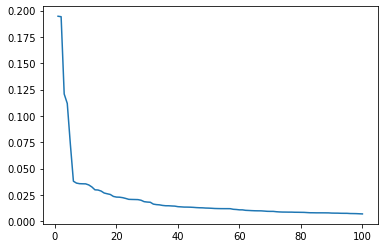

In [42]:
import matplotlib.pyplot as plt
xpt=[]
ypt=[]
i=1
for tag in tags:
  xpt.append(i)
  ypt.append(tag[1])
  i+=1
plt.plot(xpt ,ypt)
plt.show()
#前一百高TF_IDF圖

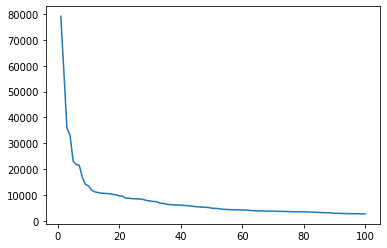

In [ ]:
xpt2=[]
ypt2=[]
i=1
for k in range(100):
  word ,count=items[k]
  xpt2.append(i)
  ypt2.append(count)
  i+=1

plt.plot(xpt2 ,ypt2)
plt.show()
#前一百高頻詞圖